In [47]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [48]:
import os
import matplotlib.pyplot as plt
HOME = os.getcwd()
print(HOME)

/content


In [49]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/107.7 GB disk)


In [50]:
from ultralytics import YOLO
from IPython.display import display, Image
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [51]:
model = YOLO(f'best.pt')

Saving CG015_M_L.png to CG015_M_L.png


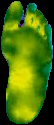

In [56]:
from google.colab import files
from IPython.display import display, Image
from PIL import Image as PilImage

# Subir la imagen
uploaded = files.upload()

# Asegurarse de que solo se suba una imagen
if len(uploaded) != 1:
    print("Por favor sube solo una imagen.")
else:
    # Obtener el nombre del archivo subido
    filename = list(uploaded.keys())[0]

    # Cargar y mostrar la imagen
    img = PilImage.open(filename)
    display(img)

In [57]:
results = model.predict(source=img, conf=0.25)


0: 640x288 1 foot, 536.9ms
Speed: 1.1ms pre-process, 536.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


In [54]:
def apply_mask_with_alpha(image, mask):
    # Convertir la imagen PIL a un array numpy
    img_np = np.array(image)

    # Asegura que la máscara sea binaria (0 o 1)
    binary_mask = np.where(mask > 0, 255, 0).astype(np.uint8)

    # Verificar si las dimensiones de la imagen y la máscara coinciden
    if img_np.shape[:2] != binary_mask.shape[:2]:
        # Redimensionar la máscara para que coincida con la imagen
        binary_mask = cv2.resize(binary_mask, (img_np.shape[1], img_np.shape[0]))

    # Crear una imagen RGBA con la máscara como canal alfa
    rgba_image = np.concatenate([img_np, binary_mask[:, :, np.newaxis]], axis=-1)

    return rgba_image

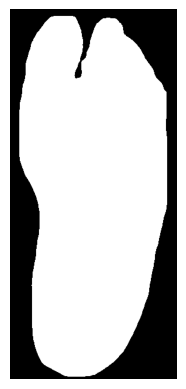

Imagen recortada guardada como: masked_image_0.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
for r in results:
    masks = r.masks.masks.cpu().numpy()
    for i, mask in enumerate(masks):
        rgba_img = apply_mask_with_alpha(img, mask)
        plt.imshow(mask, cmap='gray')
        plt.axis('off')
        plt.show()

        # Convertir la imagen RGBA a formato PIL y guardarla
        output_img = PilImage.fromarray(rgba_img, 'RGBA')
        output_filename = f"masked_image_{i}.png"
        output_img.save(output_filename)
        print(f"Imagen recortada guardada como: {output_filename}")

        # Descargar el archivo en Google Colab
        files.download(output_filename)